In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [131]:
data = pd.read_csv('data/train_data.csv', error_bad_lines=False)

/var/folders/51/svyxncy90c19w1j2cby059bm0000gn/T/ipykernel_19821/2132394297.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data/train_data.csv', error_bad_lines=False)
b'Skipping line 5856: expected 40 fields, saw 70\nSkipping line 7939: expected 40 fields, saw 49\n'


In [32]:
lot_f = 'LTFRONT'
lot_d = 'LTDEPTH'
bld_f = 'BLDFRONT'
bld_d = 'BLDDEPTH'

area_data = pd.DataFrame(data[(data[lot_f] > 0) & (data[lot_d] > 0) & (data[bld_f] > 0) & (data[bld_d] > 0)], columns=[lot_f, lot_d, bld_f, bld_d])

In [41]:
front_mean = (area_data[lot_f] - area_data[bld_f]).mean()
front_std = (area_data[lot_f] - area_data[bld_f]).std()
depth_mean = (area_data[lot_d] - area_data[bld_d]).mean()
depth_std = (area_data[lot_d] - area_data[bld_d]).std()


print(f'Front: mean {front_mean}\t std: {front_std}\nDepth: mean {depth_mean}\t std: {depth_std}')

Front: mean 11.060518034374244	 std: 45.07528268290128
Depth: mean 49.48995400629388	 std: 49.1858577008738


In [103]:
def get_mean_column_value_for_boro(data, column_name: str, boro: int, include_zeros: bool = False):
    column_vals = data[data['BORO'] == boro][column_name]
    if include_zeros:
        return np.mean(column_vals)
    else:
        return np.mean(column_vals[column_vals != 0])

In [134]:
def fill_missing_column_values_with_mean_for_boro(data, column_name: str):
    data_filled = data.copy()
    for i, row in data_filled.iterrows():
        data_filled.at[i, column_name] = get_mean_column_value_for_boro(data_filled, column_name, row['BORO'])
    return data_filled

In [130]:
def replace_lengths_with_areas(data):
    data_with_area = data.copy()
    lot_f = 'LTFRONT'
    lot_d = 'LTDEPTH'
    bld_f = 'BLDFRONT'
    bld_d = 'BLDDEPTH'
    data_with_area['LTAREA'] = data[lot_f] * data[lot_d]
    data_with_area['BLDAREA'] = data[bld_f] * data[bld_d]
    data_with_area['LTAREA'] = np.where(data_with_area['LTAREA'] == 0, data_with_area['BLDAREA'], data_with_area['LTAREA'])
    data_with_area['BLDAREA'] = np.where(data_with_area['BLDAREA'] == 0, data_with_area['LTAREA'], data_with_area['BLDAREA'])
    
    for len_col_name in [lot_f, lot_d, bld_f, bld_d]:
        del data_with_area[len_col_name]
    return data_with_area

In [57]:
data_with_area = data.copy()
data_with_area['LTAREA'] = data[lot_f] * data[lot_d]
data_with_area['BLDAREA'] = data[bld_f] * data[bld_d]

In [61]:
data_with_area['LTAREA'] = np.where(data_with_area['LTAREA'] == 0, data_with_area['BLDAREA'], data_with_area['LTAREA'])

In [132]:
data_with_area = replace_lengths_with_areas(data)

In [137]:
data_with_area_filled = fill_missing_column_values_with_mean_for_boro(data_with_area, 'LTAREA')
data_with_area_filled = fill_missing_column_values_with_mean_for_boro(data_with_area_filled, 'BLDAREA')

In [113]:
get_mean_column_value_for_boro(data_with_area, 'LTAREA', 1)

20278.494930875644

In [93]:
column_vals = data_with_area[data['BORO'] == 1]['LTAREA']

In [101]:
from sklearn import preprocessing
avland = data['AVLAND'].to_numpy()
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(avland.reshape(-1, 1))
avland_scaled = std_scaler.transform(avland.reshape(-1, 1))
# plt.plot(avland_scaled)
avland_scaled

array([[ 0.01834275],
       [-0.05684651],
       [-0.06132275],
       ...,
       [-0.06345824],
       [-0.06243566],
       [-0.06008669]])

In [173]:
import src.Preprocessing as pp
import importlib
importlib.reload(pp)

preproc = pp.Preprocessing('data/train_data.csv')
X, y = preproc.run(0.7, ['2'], 1)

            FULLVAL
FULLVAL    1.000000
STORIES   -0.123290
AVLAND     0.658087
AVTOT      1.000000
EXLAND     0.521816
EXTOT      0.611863
AVLAND2    0.699934
AVTOT2     0.988892
EXLAND2    0.516609
EXTOT2     0.604629
Latitude   0.305759
Longitude  0.313090
LTAREA     0.317053
BLDAREA    0.217378


In [174]:
X

,AVLAND,AVTOT,EXLAND,EXTOT,AVLAND2,AVTOT2,EXLAND2,EXTOT2,Latitude,Longitude,LTAREA,BLDAREA
0,-0.173742,-0.312173,0.165863,-0.004853,-0.178955,-0.307608,0.198283,0.007340,-0.228062,-0.289753,-0.474110,-0.464399
1,-0.211208,-0.352585,-0.210752,-0.229057,-0.222434,-0.354913,-0.214121,-0.230640,-0.245862,-0.126036,0.778021,0.879112
2,-0.193859,-0.346498,0.095769,-0.062069,-0.202300,-0.341757,0.121527,-0.049821,-0.224739,-0.313780,-0.474110,-0.464399
3,-0.218568,-0.142727,-0.210752,-0.229057,-0.230975,-0.155786,-0.214121,-0.230640,-0.104787,-0.090177,-0.104431,-0.067741
4,0.144921,0.362670,-0.210752,-0.229057,0.190856,0.435277,-0.214121,-0.230640,-0.071581,-0.124053,-0.474110,-0.464399
...,...,...,...,...,...,...,...,...,...,...,...,...
2584,-0.258970,-0.420656,-0.210752,-0.229057,-0.277731,-0.423406,-0.214121,-0.230640,-1.939092,-2.653920,-0.474110,-0.464399
2585,-0.260757,-0.430938,-0.210752,-0.229057,-0.279935,-0.433945,-0.214121,-0.230640,-1.858626,-2.566661,-0.474110,-0.464399
2586,-0.245725,-0.405574,-0.210752,-0.229057,-0.262267,-0.408117,-0.214121,-0.230640,-1.939092,-2.653920,-0.474110,-0.464399
2587,-0.258676,-0.422063,-0.210752,-0.229057,-0.277521,-0.425083,-0.214121,-0.230640,-2.031541,-2.608039,-0.474110,-0.464399


In [128]:
data['AVLAND2'] = data['AVLAND2'].fillna(0)

In [186]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)

])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mse')

In [187]:
hist = model.fit(X, y, epochs=100)

Epoch 1/100
81/81 [==============================] - 1s 2ms/step - loss: 1373478191104.0000
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 342878060544.0000
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 204132958208.0000
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 2163630800896.0000
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 57307996160.0000
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 29115869184.0000
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 13115521024.0000
Epoch 8/100
81/81 [==============================] - 0s 2ms/step - loss: 64076398592.0000
Epoch 9/100
81/81 [==============================] - 0s 2ms/step - loss: 19362672640.0000
Epoch 10/100
81/81 [==============================] - 0s 2ms/step - loss: 19352844288.0000
Epoch 11/100
81/81 [==============================] - 0s 2ms/step - loss: 9669158912.0000
Epo

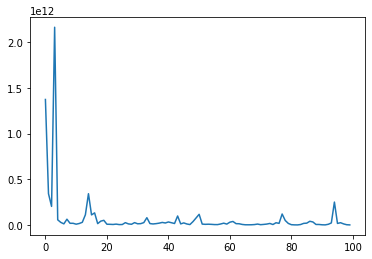

In [188]:
plt.plot(hist.history['loss'])

In [195]:
(np.mean(data['FULLVAL']) - 83782) / np.mean(data['FULLVAL'])

0.9372652487557286

In [196]:
(np.mean(data['FULLVAL']) - 83782)

1251713.8509961492

In [258]:
np.mean(data['FULLVAL'])

1335495.8509961492

In [318]:
from pathlib import Path
import json


gird_search_dir = Path('results/grid_search')
dir_paths = [d for d in gird_search_dir.iterdir() if d.is_dir()]
dir_paths.sort()

r2_res = {}
mae_res = {}
cols_names = []
threshs = []

for dir_path in dir_paths:
    cols = '_'.join(dir_path.name.split('_')[:-1])
    cols_names.append(cols)
    thresh = dir_path.name.split('_')[-1]
    threshs.append(thresh)
    total_res_path = dir_path / f'model_total_{thresh}.json'
    
    with open(total_res_path, 'rt') as f:
        total_res = json.load(f)
        
        if cols not in r2_res:
            r2_res[cols] = [total_res['r2_avg']]
            mae_res[cols] = [total_res['mae_avg']]
        else:
            r2_res[cols].append(total_res['r2_avg'])
            mae_res[cols].append(total_res['mae_avg'])
        
cols_names = list(np.unique(cols_names))
threshs = list(np.unique(threshs))

r2_res_arr = []
for k, v in r2_res.items():
    r2_res_arr.append(v)
    
r2_res_arr = np.array(r2_res_arr)

mae_res_arr = []
for k, v in mae_res.items():
    mae_res_arr.append(v)
    
mae_res_arr = np.array(mae_res_arr)

mae_res_arr /= np.mean(data['FULLVAL'])
mae_res_arr = np.abs(mae_res_arr)


In [319]:
# mae_res_arr -= np.mean(data['FULLVAL'])
mae_res_arr

array([[2.82664372e+07, 2.82664372e+07, 6.38783626e-02, 6.45153112e-02,
        6.67970160e-02],
       [3.14613577e+07, 3.14613577e+07, 6.33143001e-02, 6.33703903e-02,
        6.55967794e-02],
       [6.09038899e-02, 6.33057009e-02, 6.29253712e-02, 6.27348277e-02,
        6.49354348e-02],
       [6.11532120e-02, 6.31908823e-02, 6.31908823e-02, 6.31638175e-02,
        6.45313869e-02],
       [2.81792059e+07, 2.81792059e+07, 6.35503127e-02, 6.39621768e-02,
        6.60392880e-02],
       [2.83151896e+07, 2.83151896e+07, 6.35908296e-02, 6.39290553e-02,
        7.19894827e-02],
       [2.82773592e+07, 2.82773592e+07, 6.32882483e-02, 6.36670387e-02,
        7.07518656e-02]])

In [305]:
mae_res_arr

array([[-1.28254459e+19, -1.28254459e+19, -1.33549501e+06,
        -1.33549502e+06, -1.33549503e+06],
       [-1.58885861e+19, -1.58885861e+19, -1.33549501e+06,
        -1.33549501e+06, -1.33549502e+06],
       [-1.33549506e+06, -1.33549505e+06, -1.33549500e+06,
        -1.33549500e+06, -1.33549502e+06],
       [-1.33549508e+06, -1.33549509e+06, -1.33549509e+06,
        -1.33549509e+06, -1.33549510e+06],
       [-1.27464084e+19, -1.27464084e+19, -1.33549501e+06,
        -1.33549502e+06, -1.33549503e+06],
       [-1.28697254e+19, -1.28697254e+19, -1.33549501e+06,
        -1.33549501e+06, -1.33549503e+06],
       [-1.28353592e+19, -1.28353592e+19, -1.33549501e+06,
        -1.33549501e+06, -1.33549503e+06]])

Text(0, 0.5, 'Required columns')

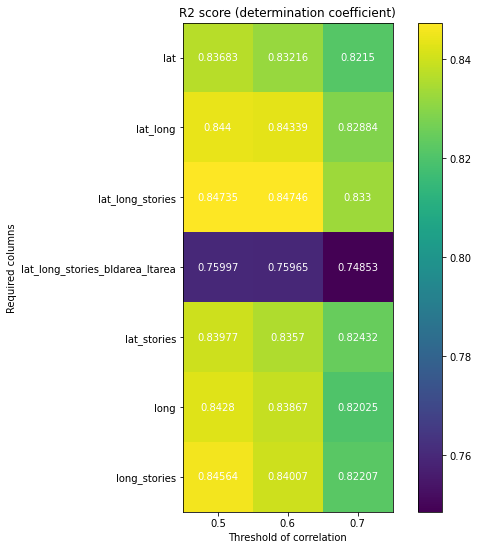

In [328]:
# selected
fig, ax = plt.subplots(figsize=(9, 9))
im = ax.imshow(r2_res_arr[:, 2:])

cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(threshs[2:])), labels=threshs[2:])
ax.set_yticks(np.arange(len(cols_names)), labels=cols_names)

for i in range(len(cols_names)):
    for j in range(len(threshs[2:])):
        text = ax.text(j, i, round(r2_res_arr[i, j+2], 5),
                       ha="center", va="center", color="w")
        
ax.set_title('R2 score (determination coefficient)')
ax.set_xlabel('Threshold of correlation')
ax.set_ylabel('Required columns')
        

Text(0, 0.5, 'Required columns')

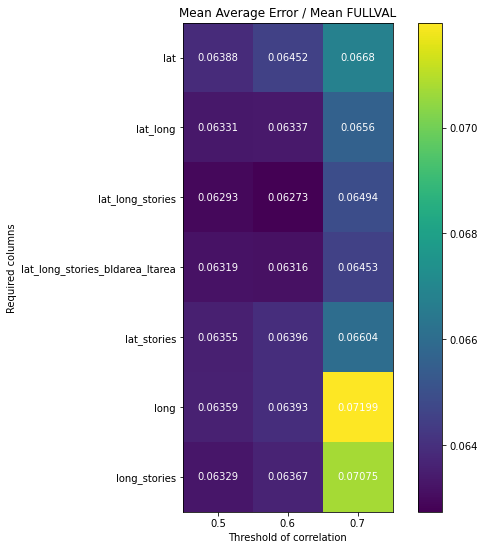

In [327]:
fig, ax = plt.subplots(figsize=(9,9))
im = ax.imshow(mae_res_arr[:, 2:])

cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(threshs[2:])), labels=threshs[2:])
ax.set_yticks(np.arange(len(cols_names)), labels=cols_names)

for i in range(len(cols_names)):
    for j in range(len(threshs[2:])):
        text = ax.text(j, i, round(mae_res_arr[i, j+2], 5),
                       ha="center", va="center", color="w")
        
ax.set_title('Mean Average Error / Mean FULLVAL')
ax.set_xlabel('Threshold of correlation')
ax.set_ylabel('Required columns')